# Digit Classification using MNIST dataset
The MNIST database (Modified National Institute of Standards and Technology database) <a href="#1">[1]</a> is a large database of handwritten digits that is commonly used for training various image processing systems. 

The MNIST database contains 60,000 training images and 10,000 testing images.<a href="#3">[3]</a> Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset.<a href="#4">[4]</a> The original creators of the database keep a list of some of the methods tested on it.<a href="#2">[2]</a> In their original paper, they use a support-vector machine to get an error rate of 0.8%.<a href="#5">[5]</a>

<strong>References</strong>

<ol>
<a href="http://yann.lecun.com/exdb/mnist/" target="_blank"><li id="1">"THE MNIST DATABASE of handwritten digits". Yann LeCun, Courant Institute, NYU Corinna Cortes, Google Labs, New York Christopher J.C. Burges, Microsoft Research, Redmond.</li></a>
<a href="http://yann.lecun.com/exdb/mnist/" target="_blank"><li id="2">LeCun, Yann; Cortez, Corinna; Burges, Christopher C.J. "The MNIST Handwritten Digit Database". Yann LeCun's Website yann.lecun.com. Retrieved 30 April 2020</li></a>
<a href="https://doi.org/10.1016%2Fj.imavis.2004.03.008" target="_blank"><li id="3">Kussul, Ernst; Baidyk, Tatiana (2004). "Improved method of handwritten digit recognition tested on MNIST database". Image and Vision Computing. 22 (12): 971–981</li></a>
<a href="http://mleg.cse.sc.edu/edu/csce822/uploads/Main.ReadingList/KNN_fastbyClustering.pdf" target="_blank"><li>Zhang, Bin; Srihari, Sargur N. (2004). "Fast k-Nearest Neighbor Classification Using Cluster-Based Trees" (PDF). IEEE Transactions on Pattern Analysis and Machine Intelligence. 26 (4): 525–528</li></a>
<a href="http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf" target="_blank"><li>LeCun, Yann; Léon Bottou; Yoshua Bengio; Patrick Haffner (1998). "Gradient-Based Learning Applied to Document Recognition" (PDF). Proceedings of the IEEE. 86 (11): 2278–2324. doi:10.1109/5.726791. Retrieved 18 August 2013</li></a>
</ol>

<h1><strong>Handwritten Digits Classification using the MLP</strong></h1>
<hr>
<br>
In this example we would build a keras model to identify the handwritten single digit numbers and assign them a category. The dataset we would use is the <strong>MNIST</strong> dataset that contains 70,000 images of handwritten digits. Out of these 70,000 images we would use 60,000 images for training the model and the remaining 10,000 would be used to test our model.
<br><br>
We would use the <strong>Adam</strong> optimizer and <strong>categorical cross-entropy</strong> as our loss function and we would use accuracy to evaluate the performance of our trained model.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.datasets import mnist

In [ ]:
# Since the data is already in tuples, so it can be easily separated into train and test samples along with labels
data = mnist.load_data()
(X_train, y_train), (X_test, y_test) = data
print(X_train[0].shape)
print(X_train.shape)
print(X_test[0].shape)
print(X_test.shape)

(28, 28)
(60000, 28, 28)
(28, 28)
(10000, 28, 28)


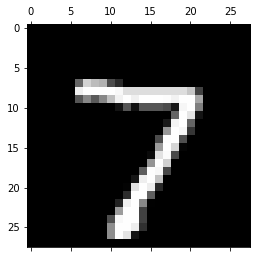

In [ ]:
# Displaying an input image
plt.matshow(X_test[0], cmap="Greys_r")

In [ ]:
# Reshaping the images to a single dimensional array
print(X_train[0].shape)
X_train = X_train.reshape((X_train.shape[0], 28*28))
X_test = X_test.reshape((X_test.shape[0], 28*28))

(28, 28)


In [ ]:
X_train[0].shape

(784,)

In [ ]:
# Normalizing the values in the range [0-1]
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# creating the model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
# Adding three hidden layers
model.add(Dense(32, input_dim = 28 * 28, activation= 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
# compiling the model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics="accuracy",
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# converting the output labels to categories
from keras.utils import np_utils

num_classes = y_test.max() + 1
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# print(y_test.shape)

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=100)

Epoch 1/10
600/600 [==============================] - 5s 3ms/step - loss: 0.4354 - accuracy: 0.8726
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1948 - accuracy: 0.9438
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1515 - accuracy: 0.9561
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1267 - accuracy: 0.9625
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1104 - accuracy: 0.9681
Epoch 6/10
600/600 [==============================] - 2s 2ms/step - loss: 0.0982 - accuracy: 0.9705
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0868 - accuracy: 0.9739
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0796 - accuracy: 0.9758
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0713 - accuracy: 0.9782
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0659 - accuracy: 0.9800

In [ ]:
scores = model.evaluate(X_test, y_test)
print("Loss: ", scores[0])
print('Accuracy: ',scores[1] * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1087 - accuracy: 0.9681
Loss:  0.10869687795639038
Accuracy:  96.81000113487244


In [ ]:
y = model.predict(X_test[0].reshape(-1,784))

In [ ]:
y.argmax()

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# <strong>Predicting using the Convolutional Neural Network</strong>
Now we will use the convolutional neural network to perform the same task and then we will compare the results of both models to see which one performs better.

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

num_classes = 10
input_shape = (28, 28, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model_1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
batch_size = 128
epochs = 15

model_1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 13s 6ms/step - loss: 0.3618 - accuracy: 0.8928 - val_loss: 0.0866 - val_accuracy: 0.9733
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.1125 - accuracy: 0.9657 - val_loss: 0.0557 - val_accuracy: 0.9843
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0863 - accuracy: 0.9735 - val_loss: 0.0488 - val_accuracy: 0.9865
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0724 - accuracy: 0.9770 - val_loss: 0.0403 - val_accuracy: 0.9890
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0638 - accuracy: 0.9803 - val_loss: 0.0368 - val_accuracy: 0.9897
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0569 - accuracy: 0.9818 - val_loss: 0.0357 - val_accuracy: 0.9898
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0534 - accuracy: 0.9833 - val_loss: 0.0352 - val_accuracy: 0.9905
Epoch

In [ ]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1]*100)

Test loss: 0.02420576848089695
Test accuracy: 99.16999936103821


In [ ]:
x_test[0].shape

(28, 28, 1)

In [ ]:
ind = 2398
y = model_1.predict(x_test[ind].reshape(-1,28,28,1)).argmax()
# y//y.max()
y

1

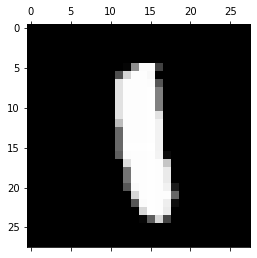

In [ ]:
plt.matshow(x_test[ind].reshape(28,28), cmap="Greys_r")

#Results
As we can see that the Convolutional Nural Network has a better performance than the Feed Forward Neural Network. The accuracy for the FFNN was almost 97% however the CNN was 99% accurate.

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving 4_2.png to 4_2.png


In [ ]:
from PIL import Image, ImageOps

Original size : (432, 513)


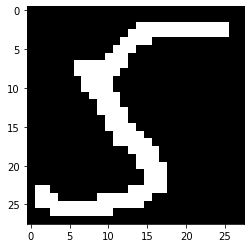

In [ ]:
image = Image.open('5_1.PNG')
print(f"Original size : {image.size}")

img = image.resize((28, 28))
img = ImageOps.grayscale(img)
# img = ImageOps.invert(img)
img = np.array(img, dtype='float32')/255
img = np.where(img>0, 0.5, 0)
plt.imshow(img, cmap="Greys_r")

In [ ]:
model_1.predict(np.expand_dims(img, 0)).argmax()

5